# Tech Intro

## Main tables

In [172]:
# Real Estate's objects
real_estate_list: list = [
    'ag_object',
    'ag_parse_ad',
    'ag_lead_object',
    'ag_presentation_object',
    'ag_object_platform',
    'ag_posting_ad_realty',
    'native_realty_filial',
    'foreign_realty_filial',
    'spr_metro',
    'spr_metro_connection',
    'ag_object_parking']
# Lead's objects
lead_list: list = [
    'leads',
    'lead_utm',
    'client_wishes',
    'leads_email_order',
    'request_from_site',
    'lead_finance',
    'leads_source_spr',
    'leads_calls_connection',
    'leads_pipeline',
    'leads_not_implemented_reason',
    'leads_status',
    'ag_pipeline',
    'ag_pipeline_status',
    'leads_meta',
    'leads_meta_fields',
    'leads_meta_group',
    'leads_contacts_connect',
    'leads_contact',
    'leads_contact_meta',
    'leads_contact_meta_fields']
# Deal's objects
deal_list: list = [
    # Deal
    'a_deal',
    'a_deal_meta',
    'deal_passport',
    'a_deal_finance',
    'a_deal_check',
    'a_deal_test',
    # Contractor
    'a_contractor',
    'a_contractor_meta',
    'a_deal_contractor',
    'a_deal_contractor_meta',
    # Object
    'a_object',
    'a_object_meta',
    'a_deal_object']

## Main Variables

In [173]:
# Address and name of your notebook
venv_path = "/home/bigdata/a.umarov/jupyter_P24"
# Exploratory Data Analysis(EDA) table of real estates (ag_object)
ag_object = real_estate_list[0] # You can generate full-EDA cycle if you want through the all of tables
                                # Just iterate it !
# Exploratory Data Analysis(EDA) obj as PySpark DataFrame (see above)
ag_object_df = None
# Set the date of checking
sample_data_date = '20221101'

## Useful command and modules (can be transform into the 'importlib'- smart import logic)

In [174]:
import os
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

#Not necessary
%matplotlib inline
# To data analyze need the module
import pyspark.pandas as ps
os.environ["PYSPARK_PYTHON"] = f"{venv_path}/bin/python3"
os.environ["PYSPARK_DRIVER_PYTHON"] = f"{venv_path}/bin/python3"

import findspark
findspark.init("/opt/dev/spark/spark")
 
from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession, SQLContext, DataFrameNaFunctions, \
                        Window, DataFrame, DataFrameStatFunctions, \
                        Column, Row, GroupedData, functions, types
from pyspark.sql.functions import isnan, when, count, col, to_date, from_unixtime

# spark.conf.set("spark.sql.session.timeZone", "America/Los_Angeles")
conf = SparkConf().setAppName("get_info_from_" + ag_object + "_table")
sc = SparkContext(conf=conf)
sc.setLogLevel("ERROR")
spark = SparkSession(sc)

W1114 21:36:56.262631 58283 process.cpp:2877] Attempted to spawn already running process version@10.62.4.11:33979
I1114 21:36:56.263625 59607 sched.cpp:241] Version: 1.11.0
I1114 21:36:56.263895 58502 sched.cpp:345] New master detected at master@10.62.4.8:5050
I1114 21:36:56.263936 58502 sched.cpp:365] No credentials provided. Attempting to register without authentication
I1114 21:36:56.266048 58498 sched.cpp:753] Framework registered with 89161c75-8817-4ae4-ab24-cba26241d6f9-64148


## Read the spec-file from Hadoop and show some data sample

In [175]:
ag_object_df = spark.read.parquet("/prod/source/p24/" + ag_object + "/datekey=" + sample_data_date)
ag_object_df.show(10, False)

+------+------------------------------------+--------+--------+------------------+-----+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Show columns' properties

In [176]:
print('Data overview')
ag_object_df.printSchema()

Data overview
root
 |-- id: string (nullable = true)
 |-- uuid: string (nullable = true)
 |-- lead_id: string (nullable = true)
 |-- agent_id: string (nullable = true)
 |-- cad_number: string (nullable = true)
 |-- title: string (nullable = true)
 |-- description: string (nullable = true)
 |-- country: string (nullable = true)
 |-- region: string (nullable = true)
 |-- city: string (nullable = true)
 |-- district: string (nullable = true)
 |-- street: string (nullable = true)
 |-- address: string (nullable = true)
 |-- address_view: string (nullable = true)
 |-- location: string (nullable = true)
 |-- location2: string (nullable = true)
 |-- price: string (nullable = true)
 |-- price_per_meter: string (nullable = true)
 |-- is_new: string (nullable = true)
 |-- rental_duration: string (nullable = true)
 |-- tenant: string (nullable = true)
 |-- object_type: string (nullable = true)
 |-- object_sub_type: string (nullable = true)
 |-- action_type: string (nullable = true)
 |-- rooms: str

## Total rows (count)

In [177]:
ag_object_df.count()

301806

## Simple func to execute and show the result of the SQL-instruction

In [178]:
def execute(select_instruction: str = "select count(*) from ag_object_sql") -> object:
    """
    Method to execute and show the result of your SQL-instruction
    :default -> "select count(*) from ag_object_sql"
    :param :string select_instruction: SQL statement
    :return: result of the SQL-operation as a table
    """
    return spark.sql(select_instruction).show(truncate = False)

## Create the Real estate's temp-table-view from the DF (called as "ag_object_sql")

In [179]:
ag_object_df.createOrReplaceTempView("ag_object_sql")

### SQL-instructions

#### Create Engaging Visuals to Highlight Important Sales Metrics 

#### Each type of property (Real Estate) (count)

In [203]:
# Creating pandas DF
real_estate_per_type = spark.sql(
     """SELECT object_type AS `Тип недвижимости`\
        , from_unixtime(published_at, 'yyyy / MM') AS `Год / месяц`\
        , count(from_unixtime(published_at, 'yyyy / MM')) AS Count\
        FROM ag_object_sql\
        WHERE published_at IS NOT null\
              AND\
              from_unixtime(published_at, 'yyyyMM') >= 202201\
        GROUP BY object_type\
            ,from_unixtime(published_at, 'yyyy / MM') \
        ORDER BY from_unixtime(published_at, 'yyyy / MM')""").toPandas()

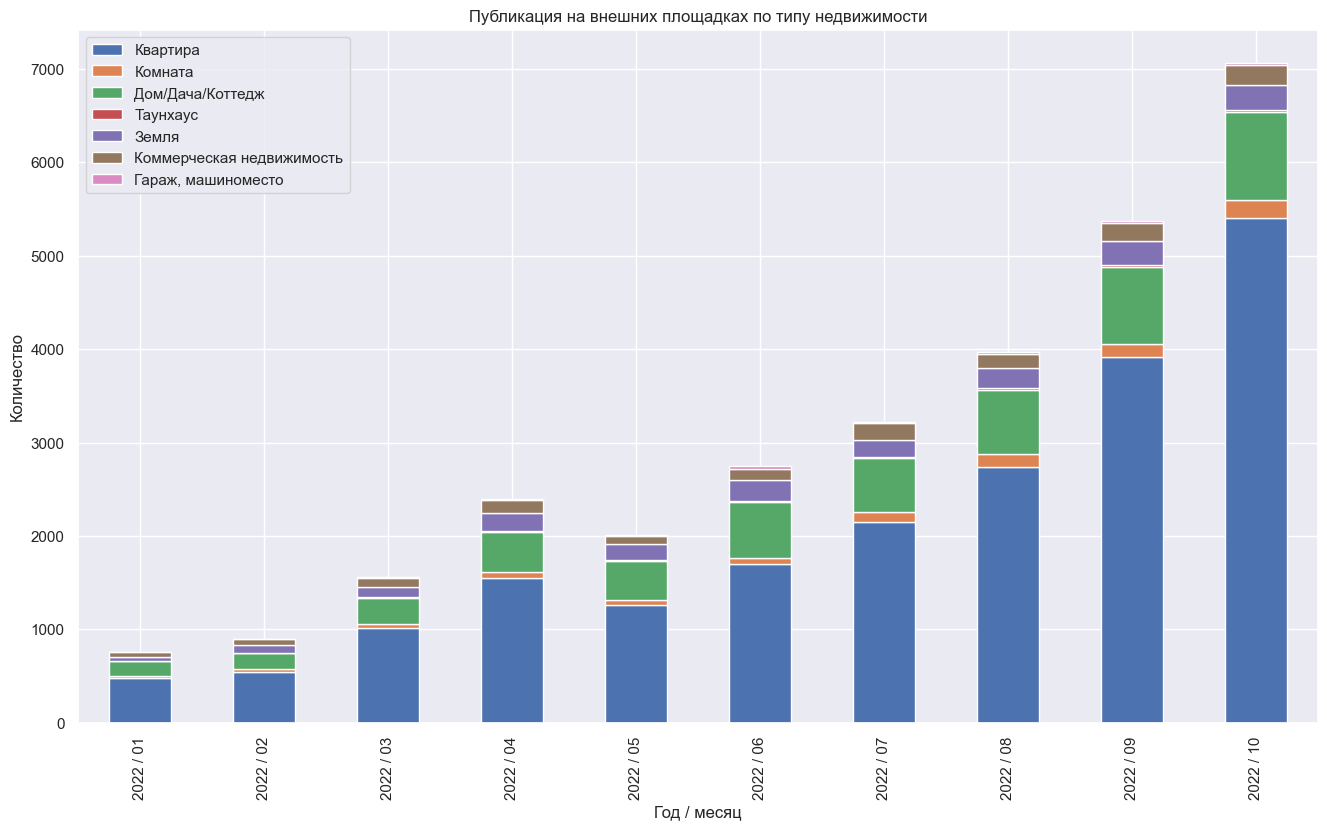

In [204]:
# Set the size
plt.rcParams["figure.figsize"] = [16,9]

real_estate_per_type.pivot_table(index = 'Год / месяц',
                          columns = 'Тип недвижимости' ,
                          values = 'Count').plot(kind = 'bar', stacked = True)

# Custom legend
plt.legend(['Квартира',
            'Комната',
            'Дом/Дача/Коттедж', 
            'Таунхаус', 
            'Земля', 
            'Коммерческая недвижимость', 
            'Гараж, машиноместо'])

# labels for x & y axis
plt.xlabel('Год / месяц')
plt.ylabel('Количество')

# Title of plot
plt.title('Публикация на внешних площадках по типу недвижимости');

##### Primary vs secondary markets in real estate (count)

In [205]:
# Creating pandas DF
real_estate_is_primary = spark.sql(
     """SELECT is_new AS `Тип недвижимости`\
        , from_unixtime(published_at, 'yyyy / MM') AS `Год / месяц`\
        , count(from_unixtime(published_at, 'yyyy / MM')) AS Count\
        FROM ag_object_sql\
        WHERE published_at IS NOT null\
              AND\
              from_unixtime(published_at, 'yyyyMM') >= 202201\
        GROUP BY is_new\
            ,from_unixtime(published_at, 'yyyy / MM') \
        ORDER BY from_unixtime(published_at, 'yyyy / MM')""").toPandas()
# SELECT CASE WHEN is_new IS TRUE THEN 'Primary' ELSE 'Secondary' END  AS Type_of_property
# Useless - pandas need the integer type

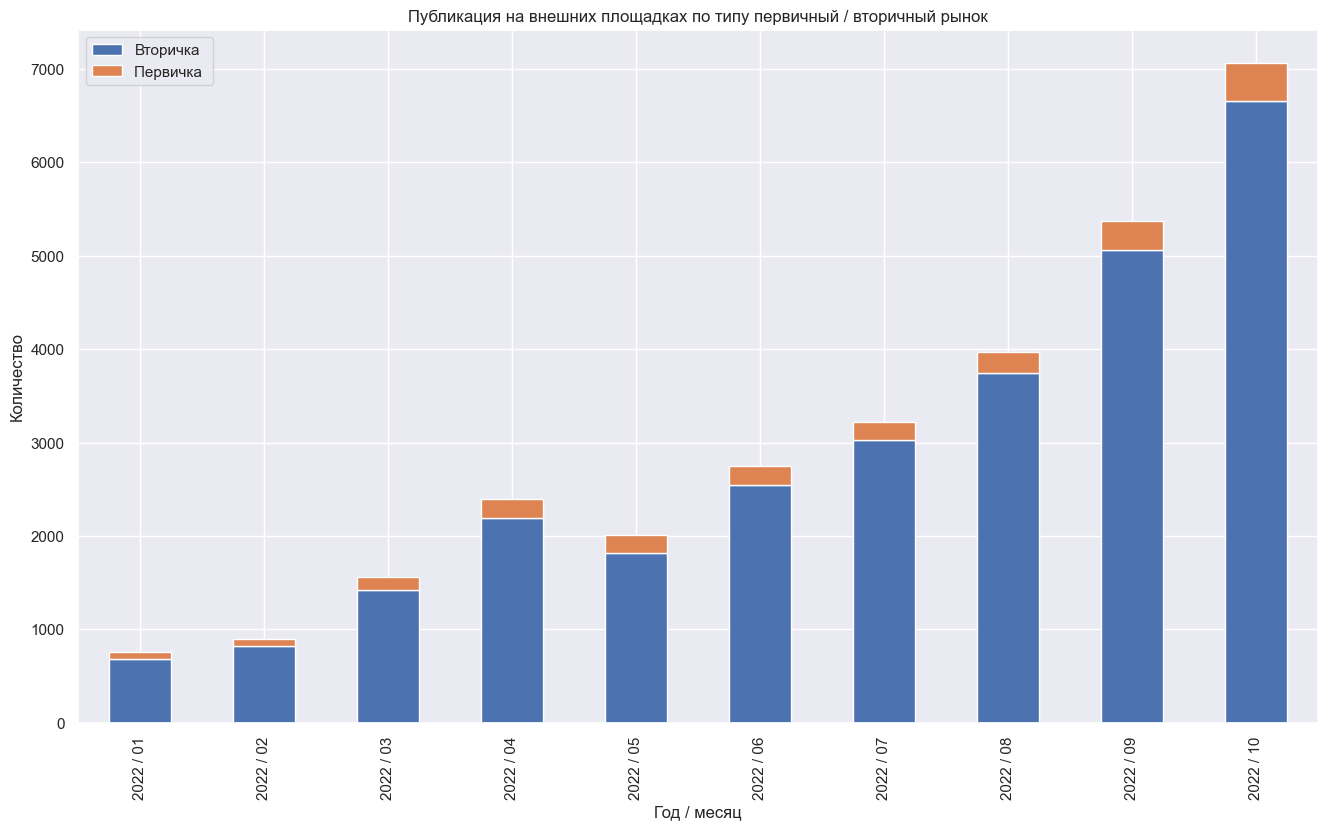

In [206]:
# Set the size
plt.rcParams["figure.figsize"] = [16,9]

real_estate_is_primary.pivot_table(index = 'Год / месяц',
                          columns = 'Тип недвижимости' ,
                          values = 'Count').plot(kind = 'bar', stacked = True)
# Custom legend
plt.legend(['Вторичка', 'Первичка '])

# labels for x & y axis
plt.xlabel('Год / месяц')
plt.ylabel('Количество')

# Title of plot
plt.title('Публикация на внешних площадках по типу первичный / вторичный рынок');

#### Each type of property (Real Estate) (Amount of sales)

In [207]:
# Creating pandas DF
real_estate_per_type_amount = spark.sql(
     """SELECT ROUND((SUM(price) / 1000000), 2) as `Sum`\
        , object_type AS `Тип недвижимости`\
        , from_unixtime(published_at, 'yyyy / MM') AS `Год / месяц`\
        FROM ag_object_sql\
        WHERE published_at IS NOT null\
              AND\
              from_unixtime(published_at, 'yyyyMM') >= 202201\
        GROUP BY object_type\
            ,from_unixtime(published_at, 'yyyy / MM') \
        ORDER BY from_unixtime(published_at, 'yyyy / MM')""").toPandas()

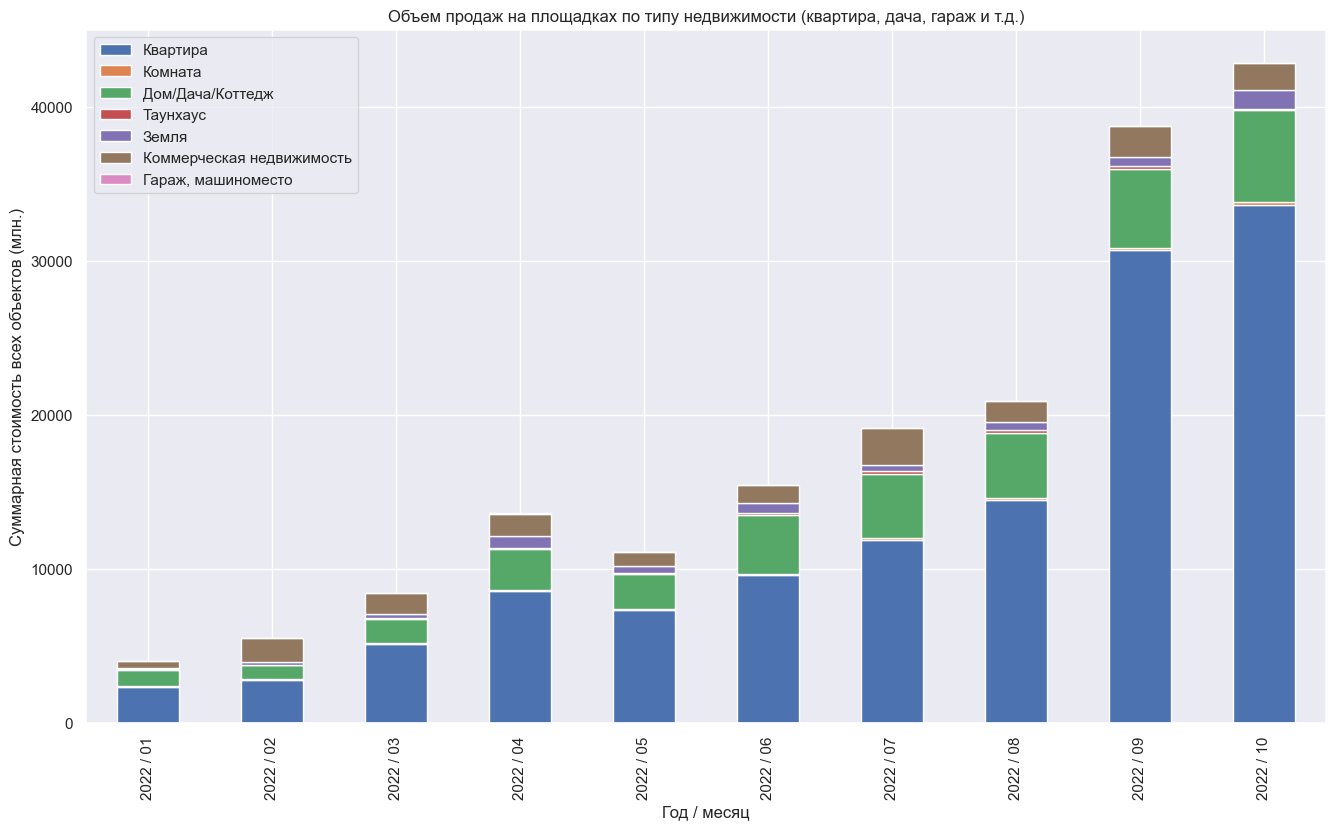

In [210]:
# Set the size
plt.rcParams["figure.figsize"] = [16,9]

real_estate_per_type_amount.pivot_table(index = 'Год / месяц',
                          columns = 'Тип недвижимости' ,
                          values = 'Sum').plot(kind = 'bar', stacked = True)
# Custom legend
plt.legend(['Квартира',
            'Комната',
            'Дом/Дача/Коттедж', 
            'Таунхаус', 
            'Земля', 
            'Коммерческая недвижимость', 
            'Гараж, машиноместо'])

# labels for x & y axis
plt.xlabel('Год / месяц')
plt.ylabel('Суммарная стоимость всех объектов (млн.)')

# Title of plot
plt.title('Объем продаж на площадках по типу недвижимости (квартира, дача, гараж и т.д.)');

##### Primary vs secondary markets in real estate (Amount of sales)

In [223]:
# Creating pandas DF
real_estate_is_primary_amount = spark.sql(
     """SELECT ROUND((SUM(price) / 1000000), 2) as `Sum`\
        , is_new AS `Тип недвижимости`\
        , from_unixtime(published_at, 'yyyy / MM') AS `Год / месяц`\
        FROM ag_object_sql\
        WHERE published_at IS NOT null\
              AND\
              from_unixtime(published_at, 'yyyyMM') >= 202201\
        GROUP BY is_new\
            ,from_unixtime(published_at, 'yyyy / MM') \
        ORDER BY from_unixtime(published_at, 'yyyy / MM')""").toPandas()

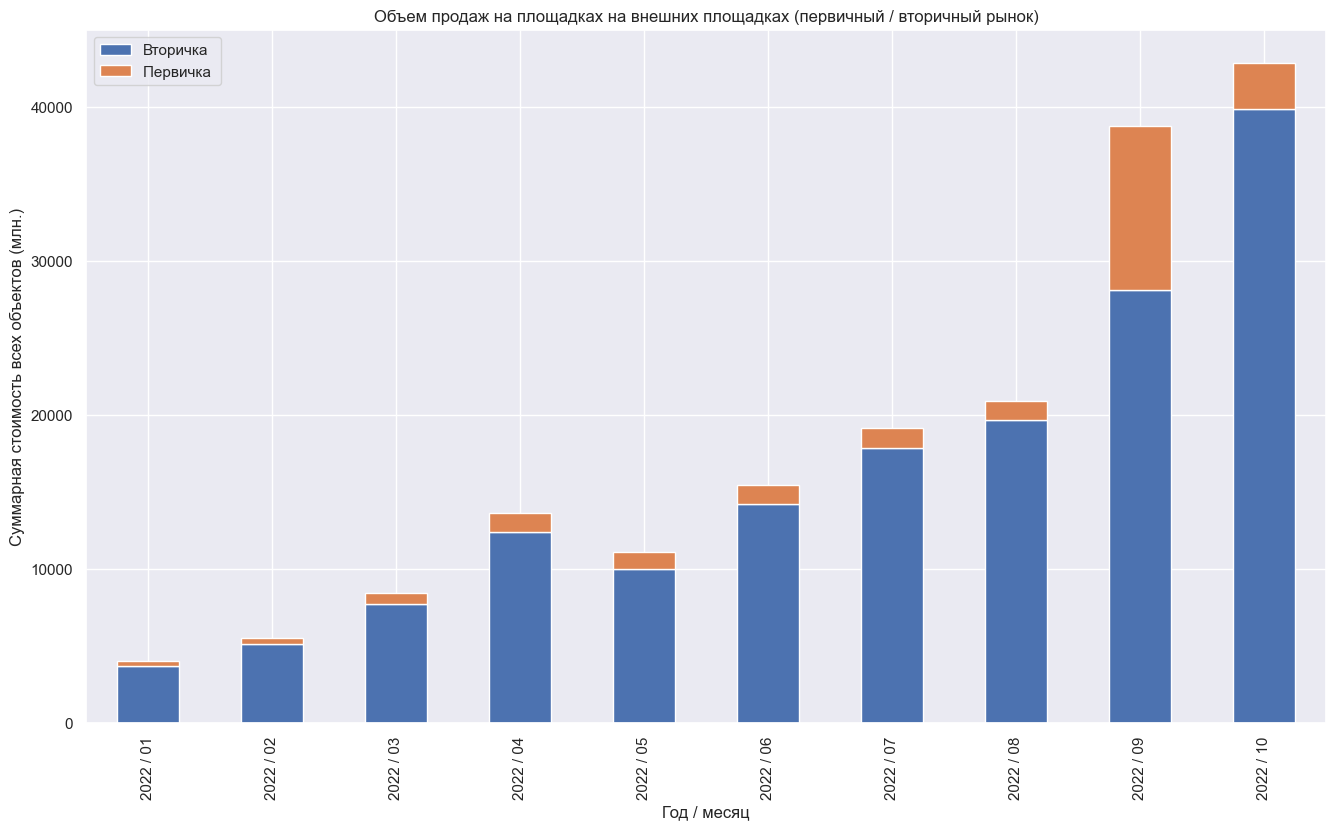

In [225]:
# Set the size
plt.rcParams["figure.figsize"] = [16,9]

real_estate_is_primary_amount.pivot_table(index = 'Год / месяц',
                          columns = 'Тип недвижимости' ,
                          values = 'Sum').plot(kind = 'bar', stacked = True)
# Custom legend
plt.legend(['Вторичка', 'Первичка '])

# labels for x & y axis
plt.xlabel('Год / месяц')
plt.ylabel('Суммарная стоимость всех объектов (млн.)')

# Title of plot
plt.title('Объем продаж на площадках на внешних площадках (первичный / вторичный рынок)');

In [226]:
spark.stop()

I1114 22:49:17.283054 58283 sched.cpp:2174] Asked to stop the driver
I1114 22:49:17.283210 58473 sched.cpp:1207] Stopping framework 89161c75-8817-4ae4-ab24-cba26241d6f9-64148
